# Simple Convolutional Neural Network for Audio Recogntion

Author: Jamie McQuire <br>

* This notebook is for the competition dataset.
* The convolutional neural network used in this report is inspired using the Keras CIFAR-10 image classification tutorial.
* [CIFAR-10](https://keras.io/examples/cifar10_cnn/)
* The network will be trained using the image data from the data pre-processing notebook.
* Upload this notebook to [Google Colab](https://colab.research.google.com/) for faster computing with a GPU.
* If you wish to repeat this analysis please upload the data from the pre-processing notebook and upload to a google drive (directories will have to be set appropriately).

In [0]:
#load in the libraries 
import os
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
import seaborn as sn
from keras import layers
from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model, load_model
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight

Using TensorFlow backend.


* Mount to your google drive where you should have the data stored.
* Alternatively you can store the data in the Colab working environment.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


* Load in the training and validation data from the pre-processing notebook.
* Set your directories for reproducible analysis.

In [0]:
#load in the training data and labels
X_train = np.load("/content/drive/My Drive/competition_data/X_train.npy")
Y_train = np.load("/content/drive/My Drive/competition_data/Y_train.npy")

#load in the validation data and labels
X_val = np.load("/content/drive/My Drive/competition_data/X_val.npy")
Y_val = np.load("/content/drive/My Drive/competition_data/Y_val.npy")

* These are the default settings.
* Check that the image_size = (161,99,1)

In [0]:
#default settings used
batch_size = 128
epochs = 10
image_size = X_train.shape[1:]
output_size = 12
print(image_size)

(161, 99, 1)


* Scale the image pixels for the deep learning models.

In [0]:
#scale the X data
X_train_scaled = X_train * (1 / 255)
X_val_scaled = X_val * (1  / 255)

* Convert the labels to one-hot-encoded vectors.

In [0]:
#one-hot encode the Y data
Y_train = keras.utils.to_categorical(Y_train,output_size)
Y_val = keras.utils.to_categorical(Y_val,output_size)

* Function to define the architecture of the CNN.

In [0]:
def SimpleConvolutionalModel(F, input_shape=(161,99,1),output_size=output_size):

  f1, f2 = F

  X_input = Input(input_shape)

  X = Conv2D(f1,(3,3),padding="same")(X_input)
  X = Activation("relu")(X)
  X = Conv2D(f1,(3,3),padding="same")(X)
  X = MaxPooling2D((2,2))(X)
  X = Dropout(0.25)(X)

  X = Conv2D(f2,(3,3),padding="same")(X)
  X = Activation("relu")(X)
  X = Conv2D(f2,(3,3),padding="same")(X)
  X = MaxPooling2D((2,2))(X)
  X = Dropout(0.25)(X)

  X = Flatten()(X)
  X = Dense(256,activation="relu")(X)
  X = Dropout(0.25)(X)
  X = Dense(output_size,activation="softmax")(X)

  model = Model(inputs=X_input,outputs=X,name="ConvNet")

  return model

* Generate the model and compile.
* Summary should provide information about the layers.

In [0]:
model = SimpleConvolutionalModel(F=[256,128])
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "ConvNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 161, 99, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 161, 99, 256)      2560      
_________________________________________________________________
activation_1 (Activation)    (None, 161, 99, 256)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 161, 99, 256)      590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 49, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 49, 256)       0         
___

* Generate the class weights to account for the differences in the number of instances of each label.
* The unknown class has significantly more files than all of the other classes.

In [0]:
Y_integers = np.argmax(Y_train, axis=1)
class_weights = compute_class_weight('balanced', np.unique(Y_integers), Y_integers)
d_class_weights = dict(enumerate(class_weights))

* Train the model over the default settings.

In [0]:
history = model.fit(X_train_scaled,Y_train,epochs=20,validation_data=(X_val_scaled,Y_val),
                    batch_size=128,shuffle=True,class_weight=d_class_weights)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 59531 samples, validate on 7200 samples
Epoch 1/20





59531/59531 [==============================] - 405s 7ms/step - loss: 1.2869 - acc: 0.4070 - val_loss: 1.3136 - val_acc: 0.5424
Epoch 2/20
59531/59531 [==============================] - 384s 6ms/step - loss: 0.5972 - acc: 0.6589 - val_loss: 0.6989 - val_acc: 0.7585
Epoch 3/20
59531/59531 [==============================] - 385s 6ms/step - loss: 0.3565 - acc: 0.7704 - val_loss: 0.5301 - val_acc: 0.8147
Epoch 4/20
59531/59531 [==============================] - 385s 6ms/step - loss: 0.2536 - acc: 0.8222 - val_loss: 0.5234 - val_acc: 0.8285
Epoch 5/20
59531/59531 [==============================] - 385s 6ms/step - loss: 0.1965 - acc: 0.8588 - val_loss: 0.4489 - val_acc: 0.8658
Epoch 6/20
59531/59531 [==============================] - 385s 6ms/step - loss: 0.1480 - acc: 0.8854 - val_loss: 0.4602 - val_acc: 0.8626
Epoch 7/20
59531/5953

* Save the model to your working environment to use later.
* This is to prevent errors causing you to have to retrain the entire model again!

In [0]:
model.save("Conv_Net_Model.h5")

* Code to plot the accuracy of the training and validation sets during model training.
* Will save to a PDF figure in the working environment.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


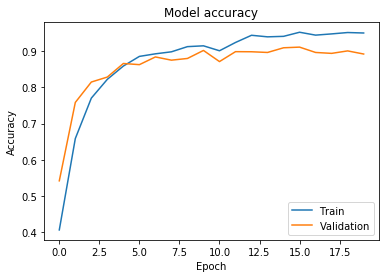

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='bottom right')
fig = plt.gcf()
fig.savefig("CNN_fvocab_acc.pdf",bbox_inches = "tight")
plt.show()

* Code to plot the loss of the training and validation sets during model training.
* Will save to a PDF figure in the working environment.

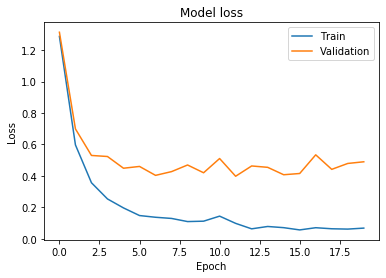

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
fig = plt.gcf()
fig.savefig("CNN_fvocab_loss.pdf",bbox_inches = "tight")
plt.show()

* Load in parts of the testing data from the previous python notebook.
* The training data is set to zero to free up memory.
* Scale the testing data and make predictions.

In [0]:
X_train_scaled = 0
X_train = 0

X1 = np.load("/content/drive/My Drive/competition_data/X_train_p1.npy")
X1 = X1 * (1/255)
predict_1 = model.predict(X1)

FileNotFoundError: ignored

* Load in the csv called filenames from the testing data pre-processing notebook.
* This contains the filenames of the testing set in a .csv file which we will fill to generate a submission for the Kaggle competition.

In [0]:
output_data = pd.read_csv("/content/drive/My Drive/competition_data/filenames.csv")

* Convert the outputs of the model to integers representing the predicted word.

In [0]:
predicted_class1 = np.argmax(predict_1,axis=1)
predicted_class2 = np.argmax(predict_2,axis=1)
predicted_class3 = np.argmax(predict_3,axis=1)

print(predicted_class1)

[ 9  6 11 ...  9 11 11]


* Create a dictionary that can map each predicted number from the model to a word.

In [0]:
label_dict = {
    
    0 : "yes",
    1 : "no",
    2 : "up",
    3 : "down",
    4 : "left",
    5 : "right",
    6 : "on",
    7 : "off",
    8 : "stop",
    9 : "go",
    10 : "silence",
    11 : "unknown"

}

* Map each predicted value from the model to a word.
* Join the lists together to get the final list.

In [0]:
predicted_class_labels1 = [label_dict[k] for k in predicted_class1]
predicted_class_labels2 = [label_dict[k] for k in predicted_class2]
predicted_class_labels3 = [label_dict[k] for k in predicted_class3]

predicted_class_label = predicted_class_labels1 + predicted_class_labels2 + predicted_class_labels3

* Create a new label in the dataframe called "label" which you will fill with the predicted labels

In [0]:
output_data["label"] = np.nan

output_data.head()

,Unnamed: 0,fname,label
0,0,clip_000044442.wav,NaN
1,1,clip_0000adecb.wav,NaN
2,2,clip_0000d4322.wav,NaN
3,3,clip_0000fb6fe.wav,NaN
4,4,clip_0001d1559.wav,NaN


* Fill "label".
* Check that label is filled correctly.

In [0]:
predicted_class_array = np.asarray(predicted_class_label)
print(predicted_class_array)

output_data["label"] = predicted_class_array

output_data.head()

['go' 'on' 'unknown' ... 'stop' 'left' 'unknown']


,Unnamed: 0,fname,label
0,0,clip_000044442.wav,go
1,1,clip_0000adecb.wav,on
2,2,clip_0000d4322.wav,unknown
3,3,clip_0000fb6fe.wav,up
4,4,clip_0001d1559.wav,unknown


* Drop the unnamed axis from the .csv file.

In [0]:
output_data = output_data.drop("Unnamed: 0",axis=1)

* Check that the output is in the correct format.

In [0]:
output_data.head()

,fname,label
0,clip_000044442.wav,go
1,clip_0000adecb.wav,on
2,clip_0000d4322.wav,unknown
3,clip_0000fb6fe.wav,up
4,clip_0001d1559.wav,unknown


* Export the dataframe to a .csv file and ensure that index=False.

In [0]:
output_data.to_csv("submission_cnn.csv",index=False)